# Calculating CpG ratio for *Pocillopora damicornis* transcriptome

This workflow calculates CpG ratio, or CpG O/E, for contigs in the *Pocillopora damicornis* [transcriptome](http://2ei.univ-perp.fr/telechargement/transcriptomes/blast2go_fasta_Pdamv2.zip). CpG ratio is an estimate of germline DNA methylation.

This workflow is an extension of another IPython notebook workflow, `Pdam_blast_anno.ipynb`, that generates an annotation of the same transcriptome. This workflow assumes that you have created the directories and files specified in the annotation workflow.


In [1]:
cd ../data/Pdam

/Users/jd/Documents/Projects/Coral-CpG-ratio-MS/data/Pdam


In [2]:
#fasta file
!head -2 blast2go_fasta_Pdamv2.fasta
!echo 
!echo number of seqs =
!fgrep -c ">" blast2go_fasta_Pdamv2.fasta

>Locus_1685_Transcript_1/2_Confidence_1.000_Length_7457_transcripts_v2_1|spectrin alpha chain
tatacgattttatgccgtggaggtgttttcttgcagaagtttcaaattatgtcctaattgtagtgtagaacggactattggacataatttgaaacttctgcaagaaaacacctccacggcataaaatcgtatatggcgatacatgaaccactgcttcaggaacactgtcttccttttgatgtttaaaccatgcactggcccacatttttgtttgctaatataacagaacttttccgctatccctaaccaagtaacaactcatcactctaaacataataacatgcactgaagaaacattacattagtaattctcttgaacactgtgatcagttaatctgttgatgatagcttcagtaatacctagcgagctgctggggtattgtcatcttccagttacattaaaccgtgaggtgtttcgtttcttcagaaataaggaacataccacaattactgcaaatctatgccggactgactaatttagctagaagagaagagttcctcgcagaaagtcttgtagtcgtaagctcccggaacttctcggcccttgtcgtcaacgtaaggattcatacgatcaatacagaagtcggcctgctccttggtgagagactgatagagctcagcctcagtaacatagagacgttttccgccctcagtgagcgccttgaaggcgttgatgacttcttgactagagccgacattttctgtttcacgactgatcatgaaggccatgtactctcccatcgacaccacaccgtcaccgttgggatccaccgttctgaggatgctttggaactccggatcttcttcgccctcttctacaatggagagatcgtagccaagagaacggaggcatgacttgaattcttgatgatccaggtaaccagtcttatccttgtcaaagtgctt

In [3]:
#Removing pipes from fasta and replacing with tab, then printing first line w/out comments and looking at contig names
!sed 's/|/\t/g' blast2go_fasta_Pdamv2.fasta | awk '{print $1}' > Pdam.fasta
!head -10 Pdam.fasta
!tail -10 Pdam.fasta

>Locus_1685_Transcript_1/2_Confidence_1.000_Length_7457_transcripts_v2_1tspectrin
tatacgattttatgccgtggaggtgttttcttgcagaagtttcaaattatgtcctaattgtagtgtagaacggactattggacataatttgaaacttctgcaagaaaacacctccacggcataaaatcgtatatggcgatacatgaaccactgcttcaggaacactgtcttccttttgatgtttaaaccatgcactggcccacatttttgtttgctaatataacagaacttttccgctatccctaaccaagtaacaactcatcactctaaacataataacatgcactgaagaaacattacattagtaattctcttgaacactgtgatcagttaatctgttgatgatagcttcagtaatacctagcgagctgctggggtattgtcatcttccagttacattaaaccgtgaggtgtttcgtttcttcagaaataaggaacataccacaattactgcaaatctatgccggactgactaatttagctagaagagaagagttcctcgcagaaagtcttgtagtcgtaagctcccggaacttctcggcccttgtcgtcaacgtaaggattcatacgatcaatacagaagtcggcctgctccttggtgagagactgatagagctcagcctcagtaacatagagacgttttccgccctcagtgagcgccttgaaggcgttgatgacttcttgactagagccgacattttctgtttcacgactgatcatgaaggccatgtactctcccatcgacaccacaccgtcaccgttgggatccaccgttctgaggatgctttggaactccggatcttcttcgccctcttctacaatggagagatcgtagccaagagaacggaggcatgacttgaattcttgatgatccaggtaaccagtcttatccttgtcaaagtgcttgaacatgatagt

In [4]:
#Converting FASTA to tabular format and placing output file in analyses directory
!perl -e '$count=0; $len=0; while(<>) {s/\r?\n//; s/\t/ /g; if (s/^>//) { if ($. != 1) {print "\n"} s/ |$/\t/; $count++; $_ .= "\t";} else {s/ //g; $len += length($_)} print $_;} print "\n"; warn "\nConverted $count FASTA records in $. lines to tabular format\nTotal sequence length: $len\n\n";' \
Pdam.fasta > ../../analyses/Pdam/fasta2tab


Converted 72890 FASTA records in 145780 lines to tabular format
Total sequence length: 28141387



In [2]:
cd ../../analyses/Pdam

/Users/jd/Documents/Projects/Coral-CpG-ratio-MS/analyses/Pdam


In [6]:
#Checking header on new tabular format file
!head -2 fasta2tab

Locus_1685_Transcript_1/2_Confidence_1.000_Length_7457_transcripts_v2_1tspectrin		tatacgattttatgccgtggaggtgttttcttgcagaagtttcaaattatgtcctaattgtagtgtagaacggactattggacataatttgaaacttctgcaagaaaacacctccacggcataaaatcgtatatggcgatacatgaaccactgcttcaggaacactgtcttccttttgatgtttaaaccatgcactggcccacatttttgtttgctaatataacagaacttttccgctatccctaaccaagtaacaactcatcactctaaacataataacatgcactgaagaaacattacattagtaattctcttgaacactgtgatcagttaatctgttgatgatagcttcagtaatacctagcgagctgctggggtattgtcatcttccagttacattaaaccgtgaggtgtttcgtttcttcagaaataaggaacataccacaattactgcaaatctatgccggactgactaatttagctagaagagaagagttcctcgcagaaagtcttgtagtcgtaagctcccggaacttctcggcccttgtcgtcaacgtaaggattcatacgatcaatacagaagtcggcctgctccttggtgagagactgatagagctcagcctcagtaacatagagacgttttccgccctcagtgagcgccttgaaggcgttgatgacttcttgactagagccgacattttctgtttcacgactgatcatgaaggccatgtactctcccatcgacaccacaccgtcaccgttgggatccaccgttctgaggatgctttggaactccggatcttcttcgccctcttctacaatggagagatcgtagccaagagaacggaggcatgacttgaattcttgatgatccaggtaaccagtcttatccttgtcaaagtgcttgaacatgatagt

In [7]:
#Add column with length of sequence
!perl -e '$col = 2;' -e 'while (<>) { s/\r?\n//; @F = split /\t/, $_; $len = length($F[$col]); print "$_\t$len\n" } warn "\nAdded column with length of column $col for $. lines.\n\n";' \
fasta2tab > tab_1


Added column with length of column 2 for 72890 lines.



In [8]:
!wc tab_1

   72890  218670 34198048 tab_1


In [9]:
#File used to count Cs and Gs will only include the sequence
!awk '{print $2}' tab_1 > tab_2

In [10]:
#This counts CGs - both cases
!echo "CG" | awk -F\[Cc][Gg] '{print NF-1}' tab_2 > CG 

In [11]:
#Counts Cs
!echo "C" | awk -F\[Cc] '{print NF-1}' tab_2 > C 

In [12]:
#Counts Gs
!echo "G" | awk -F\[Gg] '{print NF-1}' tab_2 > G 

In [146]:
#Combining counts
!paste tab_1 \
CG \
C \
G \
> comb
!head -1 comb
!tail -1 comb

Locus_1685_Transcript_1/2_Confidence_1.000_Length_7457_transcripts_v2_1tspectrin		tatacgattttatgccgtggaggtgttttcttgcagaagtttcaaattatgtcctaattgtagtgtagaacggactattggacataatttgaaacttctgcaagaaaacacctccacggcataaaatcgtatatggcgatacatgaaccactgcttcaggaacactgtcttccttttgatgtttaaaccatgcactggcccacatttttgtttgctaatataacagaacttttccgctatccctaaccaagtaacaactcatcactctaaacataataacatgcactgaagaaacattacattagtaattctcttgaacactgtgatcagttaatctgttgatgatagcttcagtaatacctagcgagctgctggggtattgtcatcttccagttacattaaaccgtgaggtgtttcgtttcttcagaaataaggaacataccacaattactgcaaatctatgccggactgactaatttagctagaagagaagagttcctcgcagaaagtcttgtagtcgtaagctcccggaacttctcggcccttgtcgtcaacgtaaggattcatacgatcaatacagaagtcggcctgctccttggtgagagactgatagagctcagcctcagtaacatagagacgttttccgccctcagtgagcgccttgaaggcgttgatgacttcttgactagagccgacattttctgtttcacgactgatcatgaaggccatgtactctcccatcgacaccacaccgtcaccgttgggatccaccgttctgaggatgctttggaactccggatcttcttcgccctcttctacaatggagagatcgtagccaagagaacggaggcatgacttgaattcttgatgatccaggtaaccagtcttatccttgtcaaagtgcttgaacatgatagt

In [147]:
!tail -20 comb

Locus_9419_Transcript_1/1_Confidence_1.000_Length_142_transcripts_v2_72905t---NA---		ttggctcatccttcttgtctgtcttcttggccctctttcctctggtctttggctcctgatctgcctcctcgcccttctcctcttcctttggctcatccttcttgtctgtcttcttggccctctttcctctggtctttggctt	142	1	51	23
Locus_9418_Transcript_2/3_Confidence_0.286_Length_141_transcripts_v2_72906t---NA---		gaaagagggccaagaagacagacaagaaggatgagccaaaggaagaggagaaggtcgagaagaatgaggatgaagggaaggaagatgagaagccaaagaccagaggaaagagggccaagaagacagacaacaaggatgagc	141	1	17	52
transcripts_v2_72907t---NA---		caccttaggaaatgattagagaatagaagggagaatatacatactgatgttaggatttaatgggtcactttaaccctttaaaccctaacatcagtatgtatattctccnnnnnnnnnnnncttctattctctaatca	137	0	23	19
transcripts_v2_72908t---NA---		ttgttggatgggtagagaatgggaattcagtttcagattaggtatgagaccatggatagttgtagctttctcagcacctgttgtagcagcttttgcagtatttgttgtttatnnnnnnnnnnggacaagctagcttttt	139	0	16	35
transcripts_v2_72909thypothetical		gaactacgtcacgtgatgacaaacttgggagagaaacttacagatgaggaagttgatgagatgatccgagaagcagatactgacagtgaagaggagatcaaggaagcctttagagtgtttga

# Calculating CpGo/e based on [Gavery and Roberts (2010)](http://www.biomedcentral.com/1471-2164/11/483)

<img src="http://eagle.fish.washington.edu/cnidarian/skitch/BMC_Genomics___Full_text___DNA_methylation_patterns_provide_insight_into_epigenetic_regulation_in_the_Pacific_oyster__Crassostrea_gigas__1A0683A5.png" alt="BMC_Genomics___Full_text___DNA_methylation_patterns_provide_insight_into_epigenetic_regulation_in_the_Pacific_oyster__Crassostrea_gigas__1A0683A5.png"/>

In [14]:
!awk '{print $1, "\t", (($4)/($5*$6))*(($3^2)/($3-1))}' comb > ID_CpG #use ^ instead of ** for exponent


awk: division by zero
 input record number 9164, file comb
 source line number 1


In [145]:
!head ID_CpG
!tail ID_CpG
!wc ID_CpG

Locus_1685_Transcript_1/2_Confidence_1.000_Length_7457_transcripts_v2_1tspectrin 	 0.499212
Locus_1685_Transcript_2/2_Confidence_1.000_Length_7457_transcripts_v2_2tspectrin 	 0.494242
Locus_177_Transcript_12/12_Confidence_0.500_Length_6585_transcripts_v2_3tvitellogenin 	 0.669218
transcripts_v2_5t---NA--- 	 0.266393
Locus_180_Transcript_15/16_Confidence_0.327_Length_6143_transcripts_v2_6t---NA--- 	 0.279666
Locus_180_Transcript_14/16_Confidence_0.308_Length_6142_transcripts_v2_7t---NA--- 	 0.279907
Locus_180_Transcript_13/16_Confidence_0.308_Length_6140_transcripts_v2_8t---NA--- 	 0.280334
Locus_180_Transcript_7/16_Confidence_0.288_Length_6119_transcripts_v2_9t---NA--- 	 0.280651
Locus_180_Transcript_11/16_Confidence_0.250_Length_5898_transcripts_v2_10t---NA--- 	 0.292432
Locus_1199_Transcript_3/4_Confidence_0.750_Length_5569_transcripts_v2_11tserine 	 0.464167
transcripts_v2_9163 	 0.849883
Locus_17783_Transcript_1/1_Confidence_1.000_Length_207_transcripts_v2_9164tmps 	 0
transcripts_

# Now joining CpG to annotation, but first must sort files.

In [3]:
#Sorting Pdam Uniprot/Swissprot annotation file. This file was the result of work done in another notebook: 
#Pdam_blast_anno.ipynb
!sort Pdam_blastx_uniprot_sql.tab | tail -n +2 > Pdam_blastx_uniprot_sql.tab.sorted
!head Pdam_blastx_uniprot_sql.tab.sorted

Locus_1000_Transcript_1/1_Confidence_1.000_Length_292_transcripts_v2_6389	nogo-b	sp	Q99LJ8	NGBR_MOUSE	35.48	93	57	2	283	5	155	244	6e-12	63.5
Locus_10015_Transcript_1/2_Confidence_1.000_Length_905_transcripts_v2_1500	sp	Q86UC2	RSPH3_HUMAN	71.43	175	50	0	17	541	297	471	3e-50	  180
Locus_10015_Transcript_2/2_Confidence_1.000_Length_896_transcripts_v2_1531	sp	Q86UC2	RSPH3_HUMAN	71.43	175	50	0	17	541	297	471	3e-50	  180
Locus_10024_Transcript_1/1_Confidence_1.000_Length_411_transcripts_v2_4529	adp-ribosylation	sp	Q99PE9	ARL4D_MOUSE	41.98	131	71	2	29	409	1	130	2e-31	  116
Locus_10027_Transcript_1/1_Confidence_1.000_Length_375_transcripts_v2_4989	kelch	sp	Q5R8W1	KLDC4_PONAB	28.81	118	79	4	23	364	136	252	2e-06	49.3
Locus_10037_Transcript_1/1_Confidence_1.000_Length_428_transcripts_v2_4337	hypothetical	sp	C3YZ51	UBA5_BRAFL	62.24	143	47	2	2	421	239	377	1e-40	  145
Locus_1003_Transcript_1/1_Confidence_1.000_Length_421_transcripts_v2_4420	protein	sp	Q22A30	RL15_TETTS	70.09	107	32	0	321	1	1	107	2e-

In [2]:
#Sorting GOSlim annotation file. This file was the result of work done in another notebook: Pdam_blast_anno.ipynb
!sort Pdam_GOSlim.tab | tail -n +2 > Pdam_GOSlim.sorted
!head Pdam_GOSlim.sorted

In [4]:
#Sorting CpG file
!sort ID_CpG > ID_CpG.sorted
!head ID_CpG.sorted

Locus_10000_Transcript_2/3_Confidence_0.667_Length_676_transcripts_v2_2486 	 0.761861
Locus_10001_Transcript_1/1_Confidence_1.000_Length_199_transcripts_v2_9515 	 0.635946
Locus_10002_Transcript_1/1_Confidence_1.000_Length_695_transcripts_v2_2386 	 0.695709
Locus_10003_Transcript_1/1_Confidence_1.000_Length_609_transcripts_v2_2870 	 0.12449
Locus_10004_Transcript_1/1_Confidence_1.000_Length_174_transcripts_v2_10976 	 0.230119
Locus_10005_Transcript_1/1_Confidence_1.000_Length_207_transcripts_v2_9134 	 0.530625
Locus_10006_Transcript_1/1_Confidence_1.000_Length_167_transcripts_v2_11475 	 1.34405
Locus_10007_Transcript_1/2_Confidence_0.857_Length_1261_transcripts_v2_788 	 0.746746
Locus_10007_Transcript_2/2_Confidence_0.857_Length_1272_transcripts_v2_779 	 0.758383
Locus_1000_Transcript_1/1_Confidence_1.000_Length_292_transcripts_v2_6389 	 0.266367


# For this analysis, *Symbiodinium* sequences were removed. Using file generated from Pdam_zoox_removal.ipynb, ID_CpG.sorted2

In [8]:
!join ID_CpG.sorted2 Pdam_blastx_uniprot_sql.tab.sorted | awk '{print $1, "\t", $2}' > Pdam_cpg_anno

In [9]:
!head Pdam_cpg_anno
!wc Pdam_cpg_anno

Locus_1000_Transcript_1/1_Confidence_1.000_Length_292_transcripts_v2_6389 	 0.266367
Locus_10015_Transcript_1/2_Confidence_1.000_Length_905_transcripts_v2_1500 	 0.364383
Locus_10015_Transcript_2/2_Confidence_1.000_Length_896_transcripts_v2_1531 	 0.368691
Locus_10024_Transcript_1/1_Confidence_1.000_Length_411_transcripts_v2_4529 	 1.4668
Locus_10027_Transcript_1/1_Confidence_1.000_Length_375_transcripts_v2_4989 	 0.847464
Locus_10037_Transcript_1/1_Confidence_1.000_Length_428_transcripts_v2_4337 	 0.578951
Locus_1003_Transcript_1/1_Confidence_1.000_Length_421_transcripts_v2_4420 	 0.914415
Locus_10043_Transcript_1/1_Confidence_1.000_Length_339_transcripts_v2_5512 	 0.52846
Locus_10044_Transcript_1/1_Confidence_1.000_Length_273_transcripts_v2_6833 	 0.533378
Locus_10045_Transcript_1/1_Confidence_1.000_Length_696_transcripts_v2_2383 	 0.206723
   19133   38266 1468482 Pdam_cpg_anno


In [2]:
!join ID_CpG.sorted2 Pdam_GOSlim.sorted > Pdam_cpg_GOslim

In [3]:
!head Pdam_cpg_GOslim

In [4]:
#Putting tabs in between columns
!awk '{print $1, "\t", $2, "\t", $3, $4, $5, $6}' Pdam_cpg_GOslim > Pdam_cpg_GOslim.tab
!head Pdam_cpg_GOslim.tab

# Now time to plot data using pandas and matplot

In [5]:
import pandas as pd

In [6]:
jData = pd.read_table('Pdam_cpg_GOslim.tab', header=None)
jData

,0,1,2
0,Locus_10004_Transcript_1/1_Confidence_1.000_Le...,0.230119,transport
1,,NaN,NaN
2,Locus_1000_Transcript_1/1_Confidence_1.000_Len...,0.266367,developmental processes
3,,NaN,NaN
4,Locus_1000_Transcript_1/1_Confidence_1.000_Len...,0.266367,other biological processes
5,,NaN,NaN
6,Locus_10024_Transcript_1/1_Confidence_1.000_Le...,1.466800,signal transduction
7,,NaN,NaN
8,Locus_10037_Transcript_1/1_Confidence_1.000_Le...,0.578951,other metabolic processes
9,,NaN,NaN


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt 

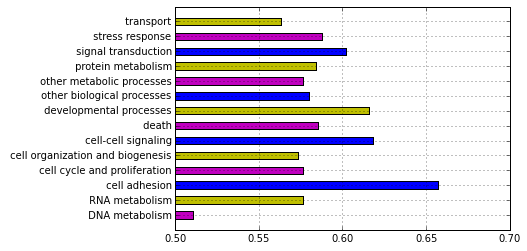

In [9]:
jData.groupby(2)[1].mean().plot(kind='barh', color=list('myb'))
plt.axis([0.5, 0.7, -1, 14])
plt.xlabel('')
plt.ylabel('')
plt.show()

In [12]:
##To plot density curve, must use CpG data WITHOUT annotation. Also must remove "-nan" in order to plot.
!awk '{print $2}' ID_CpG.sorted2 | sed '/-nan/d' > CpG
!head CpG

0.761861
0.635946
0.695709
0.12449
0.230119
0.530625
1.34405
0.746746
0.758383
0.266367


In [13]:
#To plot density curve, must use CpG data with original annotation
CpG = pd.read_table('Pdam_cpg_anno', header=None, )
CpG

,0
0,0.761861
1,0.635946
2,0.695709
3,0.124490
4,0.230119
5,0.530625
6,1.344050
7,0.746746
8,0.758383
9,0.266367


[-0.3, 1.7, 0, 1.7]

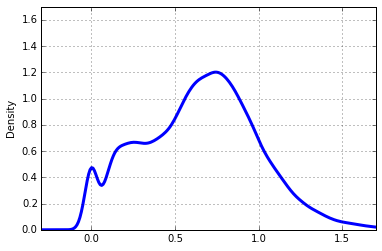

In [14]:
# pandas density plot
CpG[0].plot(kind='kde', linewidth=3);
plt.axis([-0.3, 1.7, 0, 1.7])